## Chapter 3 - Classification

#### MNIST

In [1]:
from sklearn.datasets import  fetch_openml
mnist = fetch_openml("mnist_784",version=1,as_frame=False)

In [2]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
#mnist.DESCR
print(mnist.data[0].shape)

(784,)


In [4]:
28*28

784

In [5]:
#mnist.feature_names

In [6]:
X,y = mnist["data"] , mnist["target"]
X.shape

(70000, 784)

In [7]:
y.shape

(70000,)

(784,)
(28, 28)


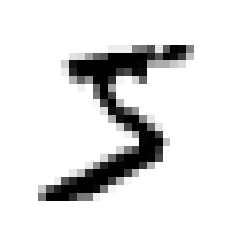

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
print(some_digit.shape)
some_digit_image = some_digit.reshape(28,28)
print(some_digit_image.shape)

plt.imshow(some_digit_image,cmap=mpl.cm.binary)
plt.axis("off")
plt.show()

In [9]:
y[0]

'5'

In [25]:
def plot_digit(data):
    """plot digit"""
    plt.figure(figsize=(3,3))
    image = data.reshape(28,28)
    plt.imshow(image,cmap=mpl.cm.binary)
    plt.axis("off")
   

target :5


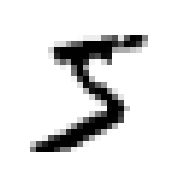

In [24]:
#visualization mnist datasets
pic_no = 0
example_images = X[pic_no]
target_images = y[pic_no]
print(f"target :{target_images}")
plot_digit(example_images)
plt.show()

In [22]:
#split datasets
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


## Training a Binary Classifier

#### 5-detector
- Predicting between 2 classes , 5 and not-5

In [30]:
#Prepare data (cleaning)
import numpy as np
y_train = y_train.astype(np.uint8)
y_test = y_test.astype(np.uint8)

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

print(y_train_5)
print(y_test_5)

[ True False False ...  True False False]
[False False False ... False  True False]


In [31]:
#Training
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000,random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

[ True]


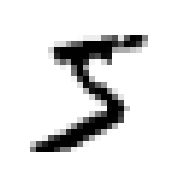

In [40]:
#Predicting
pic_predict = X[0]
print(sgd_clf.predict([pic_predict]))
plot_digit(pic_predict)

## Performance Measures

In [41]:
#Measuring Accuracy Using Cross-validation
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [42]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [44]:
#perfactly case 
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5,y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

## Precision and Recall

In [47]:
from sklearn.metrics import precision_score,recall_score

precision_score = precision_score(y_train_5,y_train_pred)
recall_score = recall_score(y_train_5,y_train_pred)

print(f"precision_score : {precision_score} ")
print(f"recall_score : {recall_score} ")

precision_score : 0.8370879772350012 
recall_score : 0.6511713705958311 


## F1 score

In [48]:
from sklearn.metrics import f1_score

print(f1_score(y_train_5,y_train_pred))

0.7325171197343846


## Precision/Recall Trade-off

In [50]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [52]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [53]:
threshold = 8000 
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [59]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function")

In [60]:
print(y_scores)

[  1200.93051237 -26883.79202424 -33072.03475406 ...  13272.12718981
  -7258.47203373 -16877.50840447]


In [69]:
threshold = 2000 #changable

y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

confusion_matrix(y_train_5,y_some_digit_pred)

array([[54169,   410],
       [ 2479,  2942]], dtype=int64)